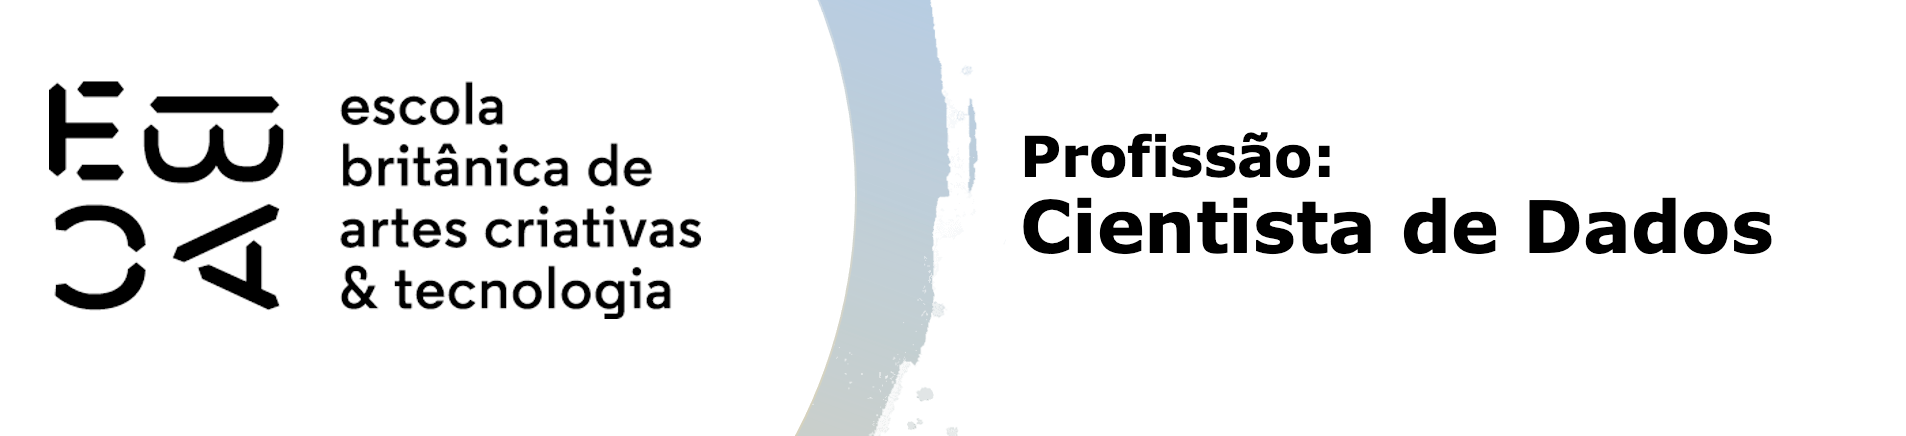

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

In [2]:
# Gerando DataFrame
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Visualizando o DataFrame
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Extratificando os acessos (houve compra e não houve compra)
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
# Separando as variáveis para análise
df_var_1 = df.iloc[:,:6]
df_var_2 = df[['SpecialDay','Weekend','Month']]
df_1 = pd.concat([df_var_1,df_var_2], axis=1)
df_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month
0,0,0.0,0,0.0,1,0.000000,0.0,False,Feb
1,0,0.0,0,0.0,2,64.000000,0.0,False,Feb
2,0,0.0,0,0.0,1,0.000000,0.0,False,Feb
3,0,0.0,0,0.0,2,2.666667,0.0,False,Feb
4,0,0.0,0,0.0,10,627.500000,0.0,True,Feb


In [6]:
# Criando uma cópia do DataFrame para visualização gráfica
df_2 = df_1.copy()

In [7]:
# Convertendo as variáveis 'Month' e 'Weekend' em numéricas para visualização gráfica
dict_mes = {'Feb':2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
       'Nov': 11, 'Dec': 12}
df_2['Month'] = df_2['Month'].map(dict_mes)
df_2['Weekend'] = df_2['Weekend'].astype(int)

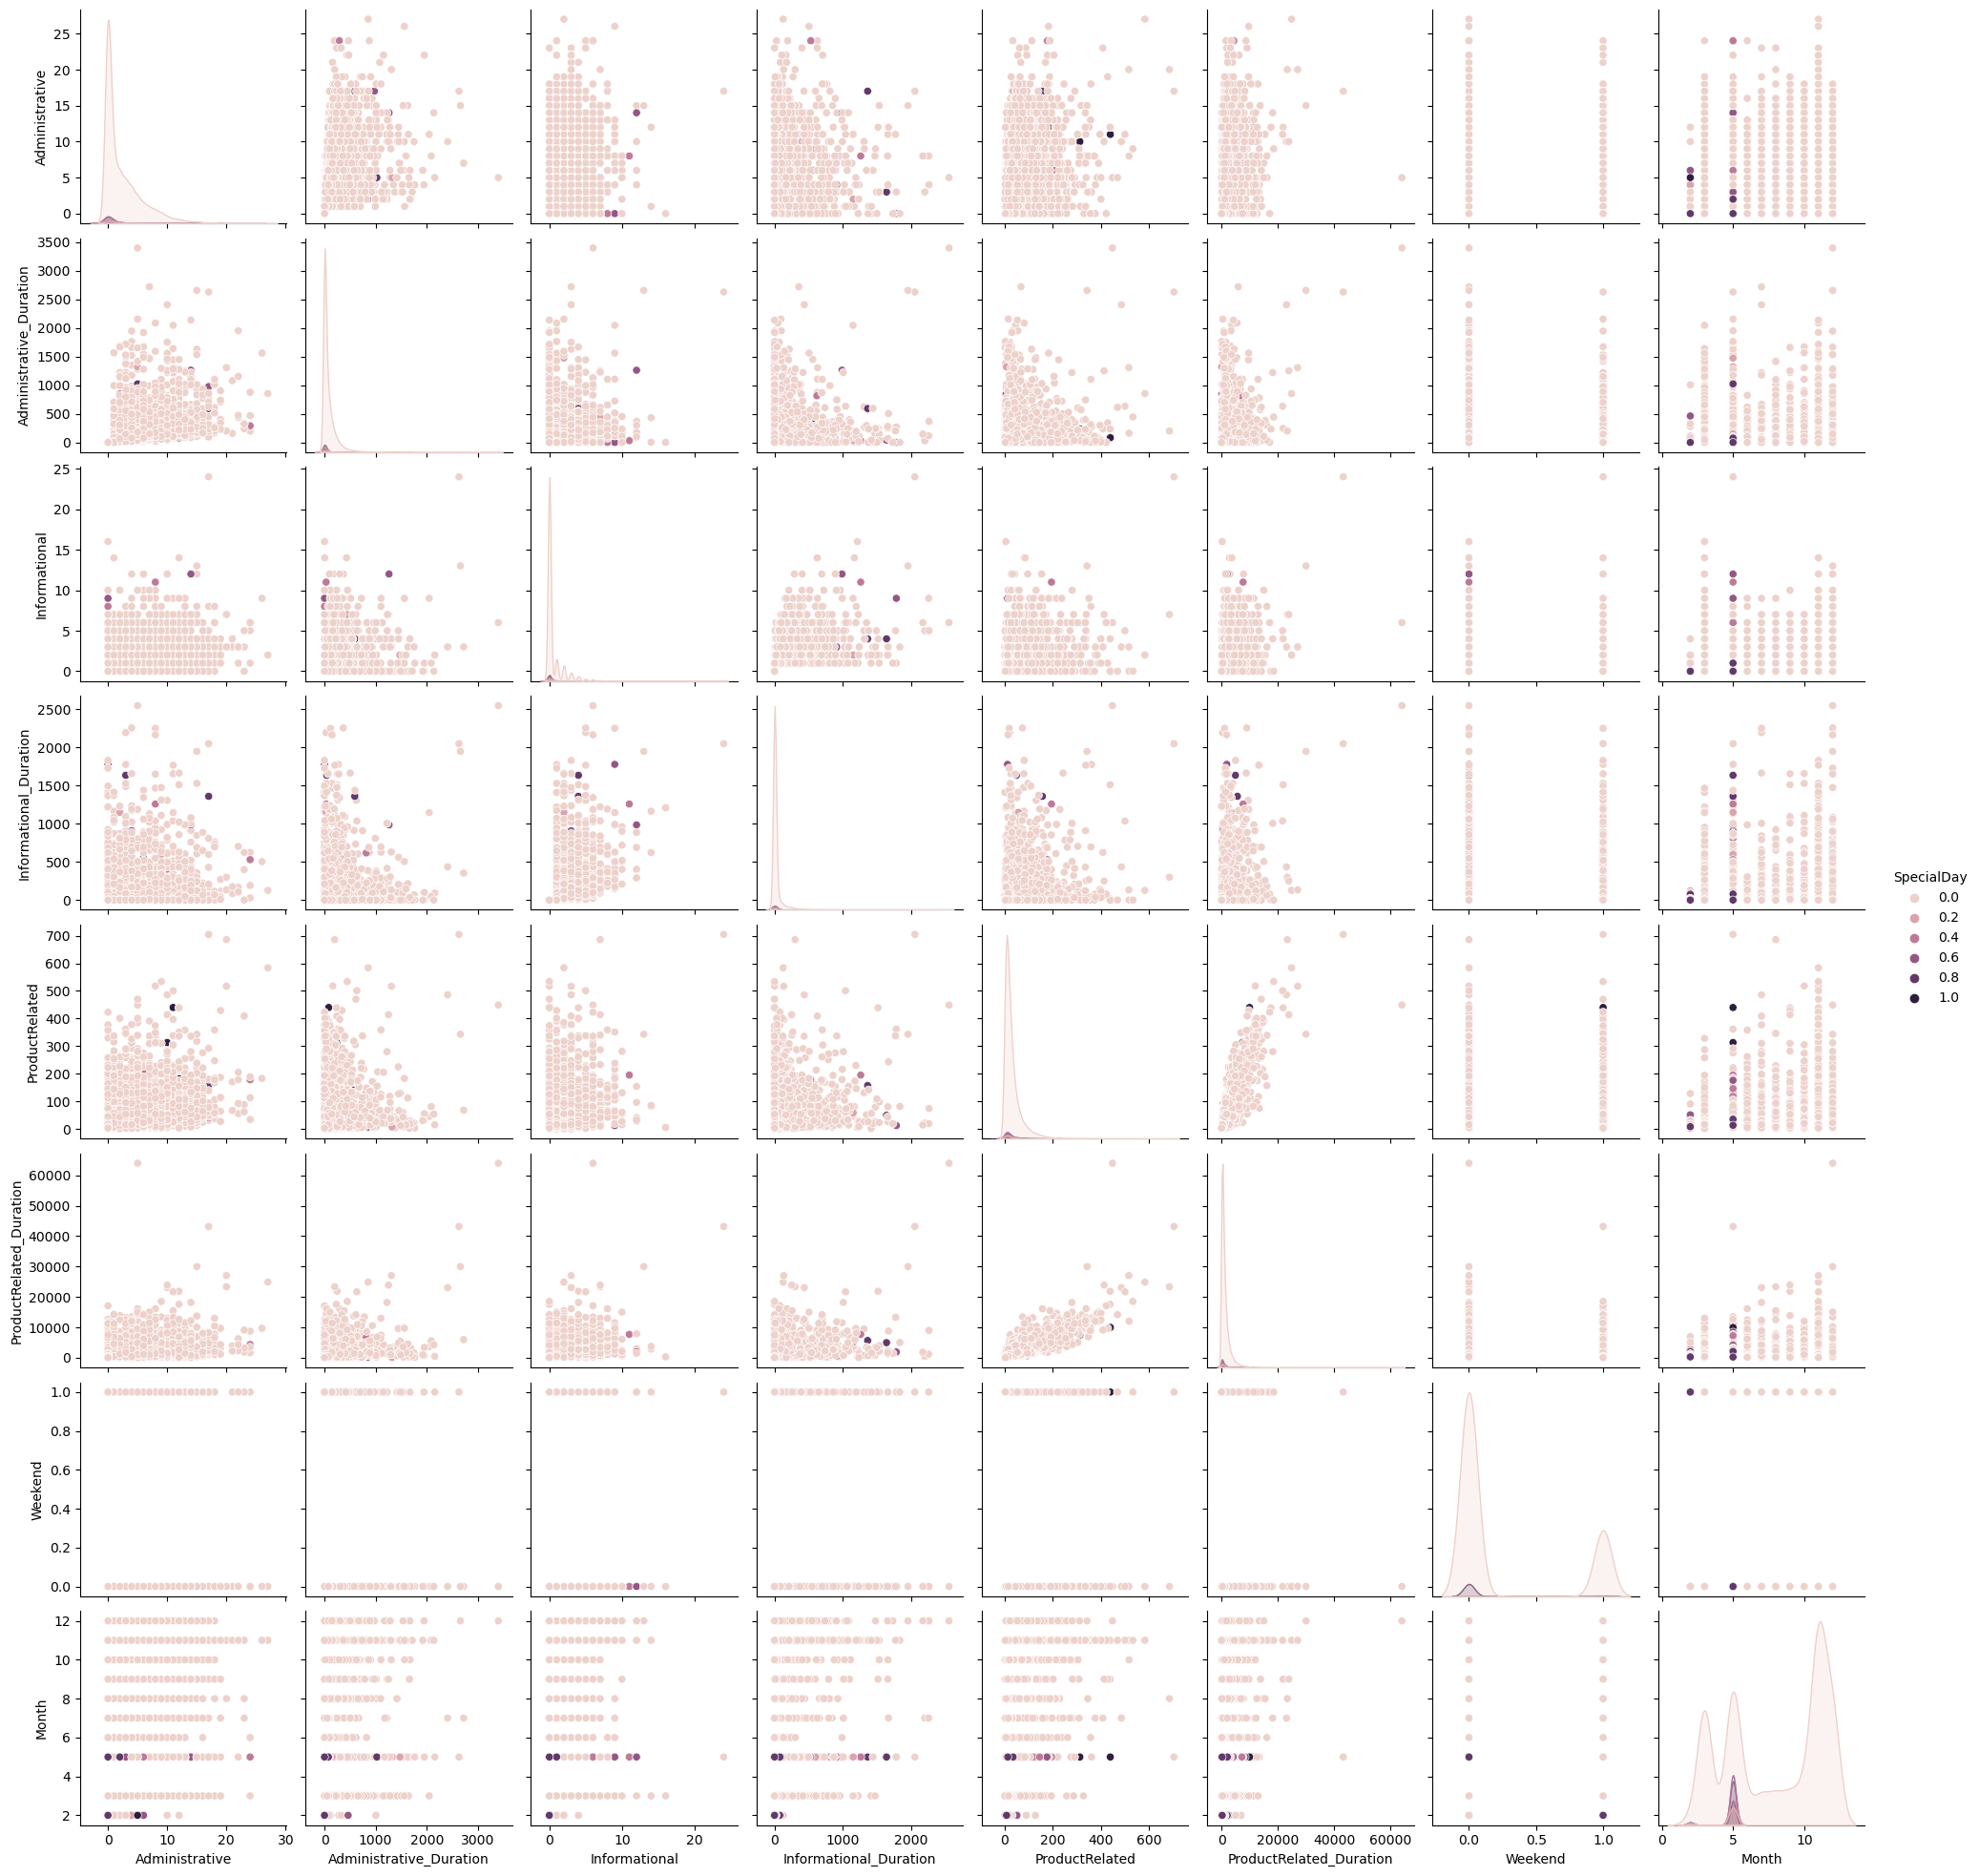

In [8]:
# Verificando a distribuição dessas variáveis
sns.pairplot(df_2, hue = 'SpecialDay')

In [9]:
# Procurando valores do tipo 'missing'
df_1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
SpecialDay                 0
Weekend                    0
Month                      0
dtype: int64

**Obs:**
- As seções de acesso apresentam pouco proximidade a uma data festiva, ocorrendo uma pequena parcela nos meses de fevereiro e maio;
- A variável informacional é a que apresenta a menor quantidade de acesso e a ProductRelated a que apresenta a maior; e
- Há necessidade de padronização das variáveis em função da variação das escalas.

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [10]:
# Selecionando para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
variaveis = df_1.columns.values[:6]

In [11]:
# Selecionando variáveis que indiquem a característica da data.
variaveis_cat = df_1.columns.values[6:]

In [12]:
# Gerando DataFrame com as variáveis 'dummies'
df_3 = pd.get_dummies(df_1.dropna(), columns = variaveis_cat)
df_3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [13]:
# Padronizando as variáveis
padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df_3.iloc[:,:6])
df_pd = pd.DataFrame(df_padronizado, columns = df_3.iloc[:,:6].columns)

In [14]:
# Ajustando o novo DataFrame
variaveis_cat_dummies = df_3.columns.values[6:]
df_var_pd = pd.concat([df_pd,df_3[variaveis_cat_dummies]], axis=1)
df_var_pd[variaveis_cat_dummies] = df_var_pd[variaveis_cat_dummies].astype(int)
df_var_pd.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [15]:
# Criando lista com a identificação das variáveis categóricas
vars_cat = [True if x in {'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'Weekend_False', 'Weekend_True', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'} else False for x in df_var_pd.columns]

In [16]:
# Calculando a matriz de distâncias utilizando a distância de Gower
distancia_gower = gower_matrix(df_var_pd, cat_features=vars_cat)

In [17]:
# ajustando o formato da matriz de distâncias para alimentar o algoritmo
gdv = squareform(distancia_gower,force='tovector')

In [18]:
# Treinando o agrupamento
Z = linkage(gdv, method='ward')
Z_df = pd.DataFrame(Z,columns=['id1','id2','dist','n'])
Z_df.head()

,id1,id2,dist,n
0,0.0,2.0,0.0,2.0
1,16.0,12330.0,0.0,3.0
2,6.0,79.0,0.0,2.0
3,24.0,50.0,0.0,2.0
4,91.0,12333.0,0.0,3.0


Leaves = 12045


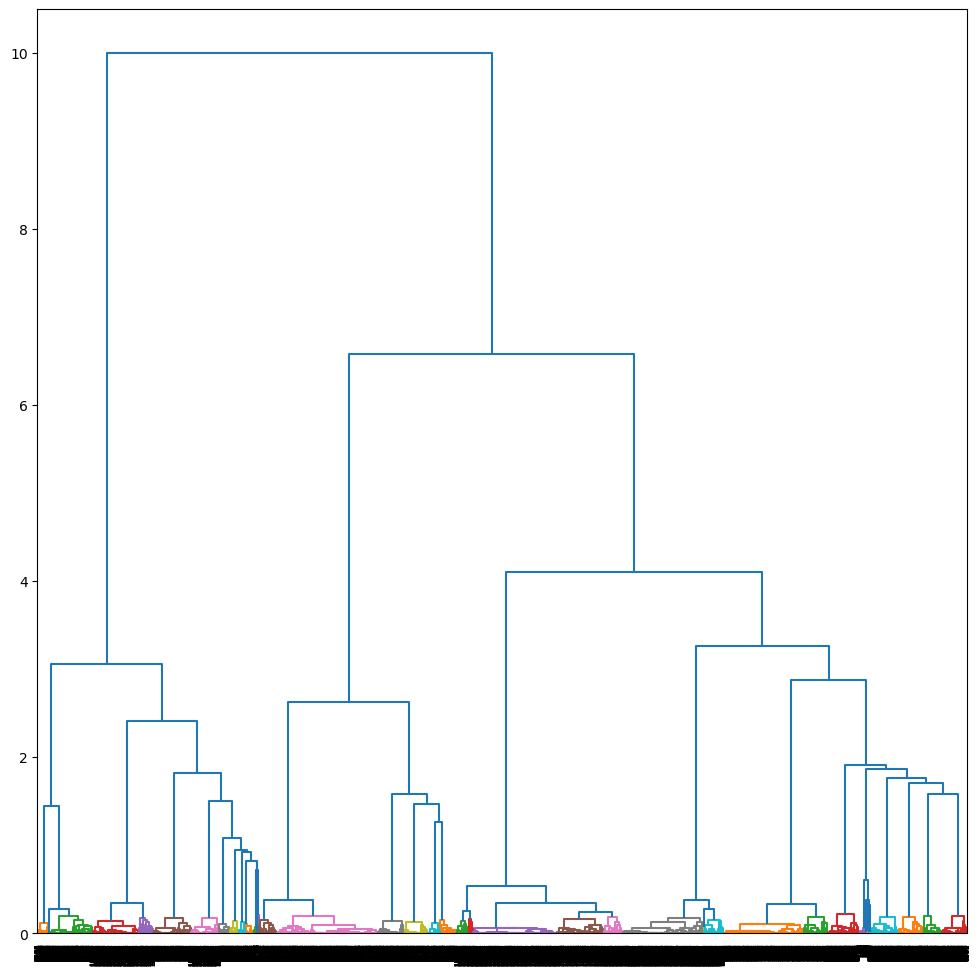

In [19]:
# Visualizando o Dendrograma
fig,axs = plt.subplots(1,1,figsize=(12,12))
dn = dendrogram(Z, truncate_mode='level',p=30,show_leaf_counts=True,ax=axs, color_threshold=.24)
print(f"Leaves = {len(dn['leaves'])}")

In [20]:
# avaliando agrupamentos hierárquicos com 3 grupos
df_grupo_3 = pd.concat([df[variaveis], df[variaveis_cat], df[['BounceRates','Revenue']]], axis=1)
df_grupo_3['grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df_grupo_3.grupo_3.value_counts()

grupo_3
3    6813
1    2868
2    2649
Name: count, dtype: int64

In [21]:
# Convertendo a varíavel 'grupo' em 'str' para melhor visualização
df_grupo_3['grupo_3'] = df_grupo_3['grupo_3'].astype(str)

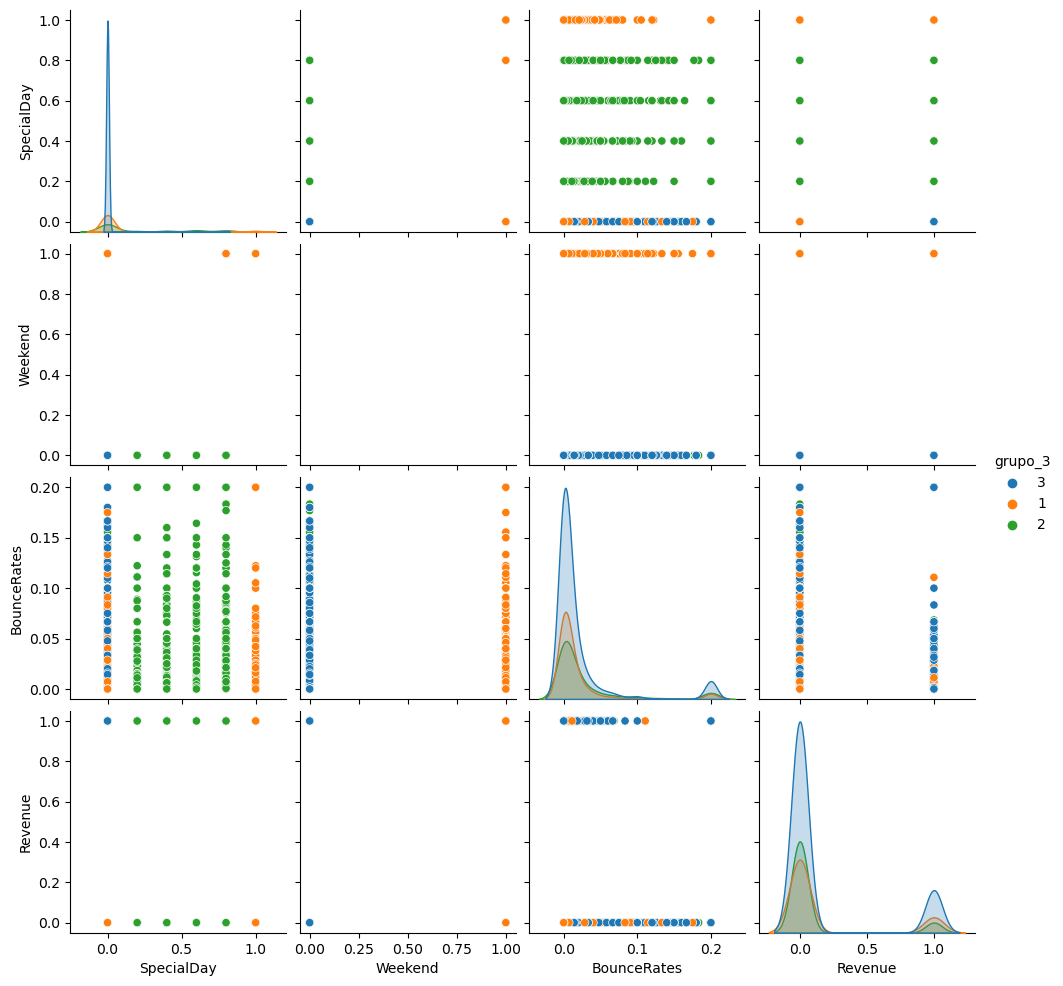

In [22]:
# Verificando a distribuição dessas variáveis
sns.pairplot(df_grupo_3.iloc[:,6:], hue = 'grupo_3')

In [23]:
# Verificando a composição do agrupamento com a decisão de compra considerando a proximidade de uma data especial
df_cross_3_1 = pd.crosstab(index=[df_grupo_3['Revenue'], df_grupo_3['SpecialDay']], 
                       columns=df_grupo_3['grupo_3'], values=df_grupo_3['SpecialDay'], 
                       aggfunc='count').fillna(0).astype(int)
df_cross_3_1

grupo_3                1     2     3
Revenue SpecialDay                  
False   0.0         2219  1426  5603
        0.2            0   149    15
        0.4            0   209    21
        0.6            0   303    19
        0.8            6   296    12
        1.0          144     0     0
True    0.0          489   200  1142
        0.2            0    14     0
        0.4            0    13     0
        0.6            0    29     0
        0.8            0    10     1
        1.0           10     0     0

In [24]:
# Verificando a composição do agrupamento com a decisão de compra considerando se é fim de semana ou não
df_cross_3_2 = pd.crosstab(index=[df_grupo_3['Revenue'], df_grupo_3['Weekend']], 
                       columns=df_grupo_3['grupo_3'], values=df_grupo_3['Weekend'], 
                       aggfunc='count').fillna(0).astype(int)
df_cross_3_2

grupo_3             1     2     3
Revenue Weekend                  
False   False       0  2383  5670
        True     2369     0     0
True    False       0   266  1143
        True      499     0     0

In [25]:
# avaliando agrupamentos hierárquicos com 4 grupos
df_grupo_4 = pd.concat([df[variaveis], df[variaveis_cat], df[['BounceRates','Revenue']]], axis=1)
df_grupo_4['grupo_4'] = fcluster(Z, 4, criterion='maxclust')
df_grupo_4.grupo_4.value_counts()

grupo_4
4    4606
1    2868
2    2649
3    2207
Name: count, dtype: int64

In [26]:
# Convertendo a varíavel 'grupo' em 'str' para melhor visualização
df_grupo_4['grupo_4'] = df_grupo_4['grupo_4'].astype(str)

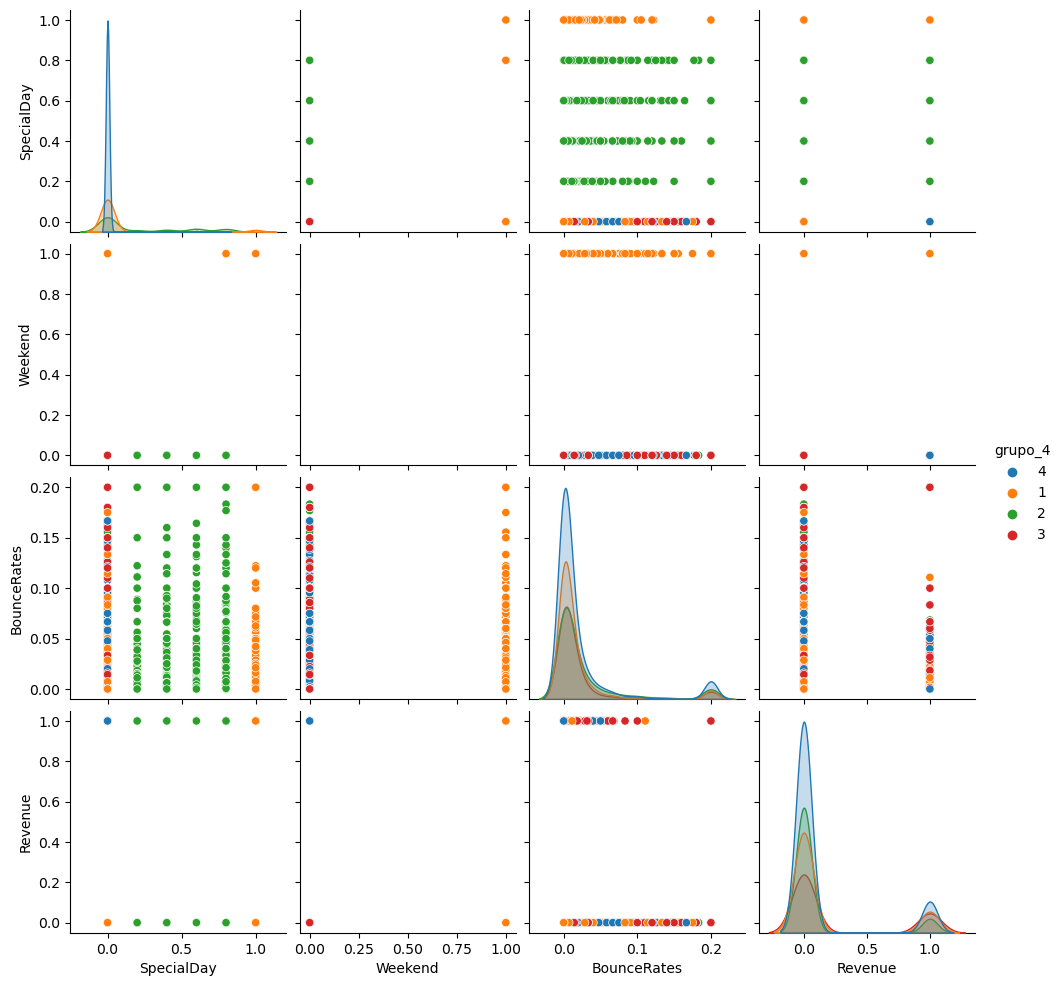

In [27]:
# Verificando a distribuição dessas variáveis
sns.pairplot(df_grupo_4.iloc[:,6:], hue = 'grupo_4')

In [28]:
# Verificando a composição do agrupamento com a decisão de compra considerando a proximidade de uma data especial
df_cross_4_1 = pd.crosstab(index=[df_grupo_4['Revenue'], df_grupo_4['SpecialDay']], 
                       columns=df_grupo_4['grupo_4'], values=df_grupo_4['SpecialDay'], 
                       aggfunc='count').fillna(0).astype(int)
df_cross_4_1

grupo_4                1     2     3     4
Revenue SpecialDay                        
False   0.0         2219  1426  1657  3946
        0.2            0   149     0    15
        0.4            0   209     0    21
        0.6            0   303     0    19
        0.8            6   296     0    12
        1.0          144     0     0     0
True    0.0          489   200   550   592
        0.2            0    14     0     0
        0.4            0    13     0     0
        0.6            0    29     0     0
        0.8            0    10     0     1
        1.0           10     0     0     0

In [29]:
# Verificando a composição do agrupamento com a decisão de compra considerando se é fim de semana ou não
df_cross_2 = pd.crosstab(index=[df_grupo_4['Revenue'], df_grupo_4['Weekend']], 
                       columns=df_grupo_4['grupo_4'], values=df_grupo_4['Weekend'], 
                       aggfunc='count').fillna(0).astype(int)
df_cross_2

grupo_4             1     2     3     4
Revenue Weekend                        
False   False       0  2383  1657  4013
        True     2369     0     0     0
True    False       0   266   550   593
        True      499     0     0     0

In [30]:
# Visualizando o quantitativo de clientes com compras em cada grupo para o agrupamento com 4 grupos
crosstab_g4 = pd.crosstab(df_grupo_4['Revenue'], df_grupo_4['grupo_4'])
crosstab_g4

grupo_4,1,2,3,4
Revenue,,,,
False,2369,2383,1657,4013
True,499,266,550,593


In [31]:
# Verificando o percentual de compra em cada grupo
crosstab_g4_norm = 100*crosstab_g4.div(crosstab_g4.sum(axis=0), axis=1)
crosstab_g4_norm

grupo_4,1,2,3,4
Revenue,,,,
False,82.601116,89.958475,75.079293,87.125488
True,17.398884,10.041525,24.920707,12.874512


#### Análise:
- Foram testados os quatro tipos de ligações para o algoritmo e o que apresentou melhor resultado para o modelo em questão foi o tipo 'Ward';
- Os demais tipos apresentaram grupos pequenos nas divisões de 03 e/ou 04 grupos;
- Os dois agrupamentos (com 3 e 4 grupos) diferem pelo desmembramento de um dos grupos; e
- Considerando que o desmembramento do grupo de número '3', como o novo agrupamento: 4 grupos, acrescentou um grupo com clientes mais propensos à compra, representando cerca de 17,90% do total de acessos; adotaremos o agrupamento com 4 grupos. 

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

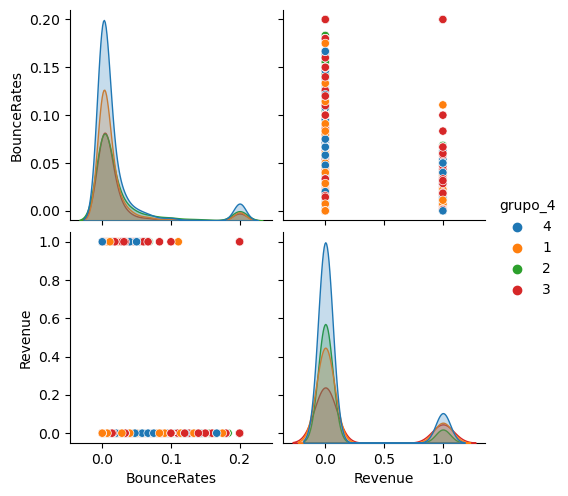

In [32]:
sns.pairplot(df_grupo_4.iloc[:,8:], hue = 'grupo_4')

In [33]:
# Visualizando o quantitativo de clientes com compras em cada grupo para o agrupamento com 3 grupos
crosstab_g4_norm

grupo_4,1,2,3,4
Revenue,,,,
False,82.601116,89.958475,75.079293,87.125488
True,17.398884,10.041525,24.920707,12.874512


**Conclusão:**
- O **grupo 3**, **clientes que acessam 100% no meio da semana e 100% distantes de datas especiais**, apresentam o maior propensão à compras, num percentual de **24,92%**).